Success rate: 0.644
Final Q-Table Values
LEFT DOWN RIGHT UP
[[7.65457412e-01 2.00167292e-02 2.14077163e-02 2.42171709e-02]
 [9.83818147e-04 2.00784624e-03 0.00000000e+00 6.82509495e-01]
 [1.09605470e-03 1.52616718e-02 5.70786096e-03 4.80203774e-01]
 [8.82059552e-04 4.34998123e-03 3.52388248e-03 4.62722867e-01]
 [8.14584553e-01 4.10996521e-04 4.31271700e-03 3.69785891e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.10149308e-01 4.40675120e-05 2.47999435e-04 1.20719985e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.00808777e-03 4.07380470e-03 0.00000000e+00 8.44428837e-01]
 [7.38004261e-03 5.02152135e-01 0.00000000e+00 2.72301704e-03]
 [8.70968243e-01 1.42371150e-03 2.20972978e-03 3.08716372e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [7.79186973e-03 5.65455298e-03 9.30525872e-01 4.15968988e-03]
 [0.00000000e+00 9.98207649e-01 0.00000000e+00 0.00000000e

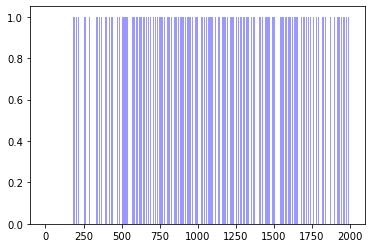

In [20]:
import gym
import numpy as np
import matplotlib.pyplot as plt

env = gym.make('FrozenLake-v0')
 
# Initialize table with all zeros
Q = np.zeros([env.observation_space.n, env.action_space.n])

# Set learning parameters
learning_rate = 0.8
dis = .99
num_episodes = 2000

# create lists to contain total rewards and steps per episode
rList = []
for i in range(num_episodes):
    # Reset environment and get first new observation
    state = env.reset()
    rAll = 0
    done = False

    # The Q-Table learning algorithm
    while not done:
        action = np.argmax(Q[state, :] + np.random.randn(1, env.action_space.n) / (i + 1))

        # Get new state and reward from environment
        new_state, reward, done, _ = env.step(action)

        # Update Q-Table with new knowledge using learning rate
        Q[state, action] = (1-learning_rate) * Q[state, action] \
            + learning_rate *(reward + dis * np.max(Q[new_state, :]))
        
        #새 지식 학습률 제외
        #Q[state, action] = reward + dis * np.max(Q[new_state, :])
       
        rAll += reward
        state = new_state

    rList.append(rAll)

print("Success rate: " + str(sum(rList) / num_episodes))
print("Final Q-Table Values")
print("LEFT DOWN RIGHT UP")
print(Q)
plt.bar(range(len(rList)), rList, color='b', alpha=0.4)
plt.show()



